In [73]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

%matplotlib inline

pd.options.display.width = 200

In [74]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p wget,pandas,numpy,geopy,altair,vega,vega_datasets,watermark 

# date
print (" ")
%watermark -u -n -t -z 

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 3.7.4
IPython 7.8.0

wget 3.2
pandas 0.25.1
numpy 1.17.1
geopy 1.20.0
altair 4.0.0
vega 2.6.0
vega_datasets 0.8.0
watermark 2.0.2

compiler   : Clang 10.0.1 (clang-1001.0.46.4)
system     : Darwin
release    : 19.0.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit
 
last updated: Sat Dec 28 2019 23:22:48 EST


In [75]:
# Read csv file into a Pandas df.
df=pd.read_csv("nap.csv", engine='python')
df.head()

,Date,StartTime,EndTime,TotalNapTime
0,09/05/2018,9:37,10:23,0:46
1,09/05/2018,2:26,3:15,0:49
2,09/06/2018,9:23,10:02,0:39
3,09/06/2018,1:24,2:11,0:47
4,09/07/2018,9:23,10:02,0:39


In [76]:
df.columns = ['Date', 'StartTime', 'EndTime', 'TotalNapTime']

In [77]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

df['Year'] = df['Date'].dt.year

# Extract month from date.
df['Month'] = df['Date'].dt.month_name()

# Extract day of week from date.
df['Opened Day'] = df['Date'].dt.weekday_name


In [78]:
df.head()
#df.dtypes

,Date,StartTime,EndTime,TotalNapTime,Year,Month,Opened Day
0,2018-09-05,9:37,10:23,0:46,2018,September,Wednesday
1,2018-09-05,2:26,3:15,0:49,2018,September,Wednesday
2,2018-09-06,9:23,10:02,0:39,2018,September,Thursday
3,2018-09-06,1:24,2:11,0:47,2018,September,Thursday
4,2018-09-07,9:23,10:02,0:39,2018,September,Friday


In [79]:
#df['hours']=df['StartTime'].dt.hour
df['hours']=df['StartTime'].apply(lambda s: int(s.split(':')[0]))

In [80]:
df.head()

,Date,StartTime,EndTime,TotalNapTime,Year,Month,Opened Day,hours
0,2018-09-05,9:37,10:23,0:46,2018,September,Wednesday,9
1,2018-09-05,2:26,3:15,0:49,2018,September,Wednesday,2
2,2018-09-06,9:23,10:02,0:39,2018,September,Thursday,9
3,2018-09-06,1:24,2:11,0:47,2018,September,Thursday,1
4,2018-09-07,9:23,10:02,0:39,2018,September,Friday,9


In [81]:
df['AM-PM']= df['hours'].apply(lambda x: 'AM' if x >=7  else 'PM')

In [82]:
df.head()

,Date,StartTime,EndTime,TotalNapTime,Year,Month,Opened Day,hours,AM-PM
0,2018-09-05,9:37,10:23,0:46,2018,September,Wednesday,9,AM
1,2018-09-05,2:26,3:15,0:49,2018,September,Wednesday,2,PM
2,2018-09-06,9:23,10:02,0:39,2018,September,Thursday,9,AM
3,2018-09-06,1:24,2:11,0:47,2018,September,Thursday,1,PM
4,2018-09-07,9:23,10:02,0:39,2018,September,Friday,9,AM


In [83]:
df.dtypes

Date            datetime64[ns]
StartTime               object
EndTime                 object
TotalNapTime            object
Year                     int64
Month                   object
Opened Day              object
hours                    int64
AM-PM                   object
dtype: object

In [84]:
#df['StartTime_AM-PM'] = pd.concat(df['StartTime'],df['AM-PM'],ignore_index=True)
df['StartTime_AM-PM'] = df[['StartTime', 'AM-PM']].apply(lambda x: ' '.join(x), axis=1)
df['EndTime_AM-PM'] = df[['EndTime', 'AM-PM']].apply(lambda x: ' '.join(x), axis=1)

df.head()

,Date,StartTime,EndTime,TotalNapTime,Year,Month,Opened Day,hours,AM-PM,StartTime_AM-PM,EndTime_AM-PM
0,2018-09-05,9:37,10:23,0:46,2018,September,Wednesday,9,AM,9:37 AM,10:23 AM
1,2018-09-05,2:26,3:15,0:49,2018,September,Wednesday,2,PM,2:26 PM,3:15 PM
2,2018-09-06,9:23,10:02,0:39,2018,September,Thursday,9,AM,9:23 AM,10:02 AM
3,2018-09-06,1:24,2:11,0:47,2018,September,Thursday,1,PM,1:24 PM,2:11 PM
4,2018-09-07,9:23,10:02,0:39,2018,September,Friday,9,AM,9:23 AM,10:02 AM


In [85]:
from datetime import datetime
from dateutil.parser import parse

ts = '09/01/2019'

change_class = datetime.strptime(ts, '%m/%d/%Y')


#df['Class'] = df['Date'].apply(lambda x: 'Toddler' if x <= ts else 'Infant')

df['Class'] = df['Date'].apply (
    lambda x : 'Toddler' if x > change_class else 'Infant')

df['TotalNapTime_mins'] =df['TotalNapTime'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

df.head()
   

,Date,StartTime,EndTime,TotalNapTime,Year,Month,Opened Day,hours,AM-PM,StartTime_AM-PM,EndTime_AM-PM,Class,TotalNapTime_mins
0,2018-09-05,9:37,10:23,0:46,2018,September,Wednesday,9,AM,9:37 AM,10:23 AM,Infant,46
1,2018-09-05,2:26,3:15,0:49,2018,September,Wednesday,2,PM,2:26 PM,3:15 PM,Infant,49
2,2018-09-06,9:23,10:02,0:39,2018,September,Thursday,9,AM,9:23 AM,10:02 AM,Infant,39
3,2018-09-06,1:24,2:11,0:47,2018,September,Thursday,1,PM,1:24 PM,2:11 PM,Infant,47
4,2018-09-07,9:23,10:02,0:39,2018,September,Friday,9,AM,9:23 AM,10:02 AM,Infant,39


In [86]:
#nap = df.groupby('Date').count()
nap = df.groupby('Date').sum()
nap

,Year,hours,TotalNapTime_mins
Date,,,
2018-09-05,4036,11,95
2018-09-06,4036,10,86
2018-09-07,6054,19,170
2018-09-10,4036,13,69
2018-09-11,4036,10,103
...,...,...,...
2019-12-09,2019,12,104
2019-12-10,2019,12,112
2019-12-11,2019,12,71


In [87]:
#tech = tech.reset_index(0)
#tech = tech[['Opened Date', 'Technology', 'Attribute']]
#tech.plot.line(x='Opened Date', y='Technology', rot=45, style='.-', figsize=(12,7))

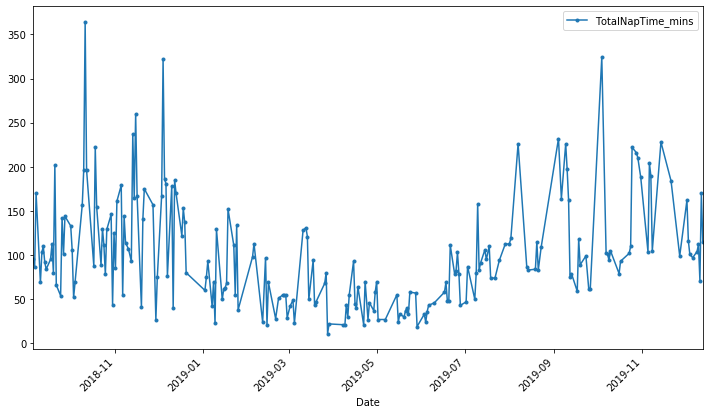

In [88]:
nap = nap.reset_index(0)
#nap = nap[['Date', 'TotalNapTime_mins', 'Class']]
nap.plot.line(x='Date', y='TotalNapTime_mins', rot=45, style='.-', figsize=(12,7))

In [89]:
ByClass = df.groupby(['Class', 'AM-PM']).count()
ByClass

Date  StartTime  EndTime  TotalNapTime  Year  Month  Opened Day  hours  StartTime_AM-PM  EndTime_AM-PM  TotalNapTime_mins
Class   AM-PM                                                                                                                           
Infant  AM      189        189      189           189   189    189         189    189              189            189                189
        PM       94         94       94            94    94     94          94     94               94             94                 94
Toddler AM       59         59       59            59    59     59          59     59               59             59                 59

In [90]:
ByClass = ByClass.reset_index([0,1])
ByClass = ByClass[['Class', 'AM-PM', 'TotalNapTime_mins']]
ByClass

,Class,AM-PM,TotalNapTime_mins
0,Infant,AM,189
1,Infant,PM,94
2,Toddler,AM,59


In [91]:
ByClass = ByClass.pivot(index='AM-PM', columns='Class', values='TotalNapTime_mins')
ByClass

Class,Infant,Toddler
AM-PM,,
AM,189.0,59.0
PM,94.0,NaN


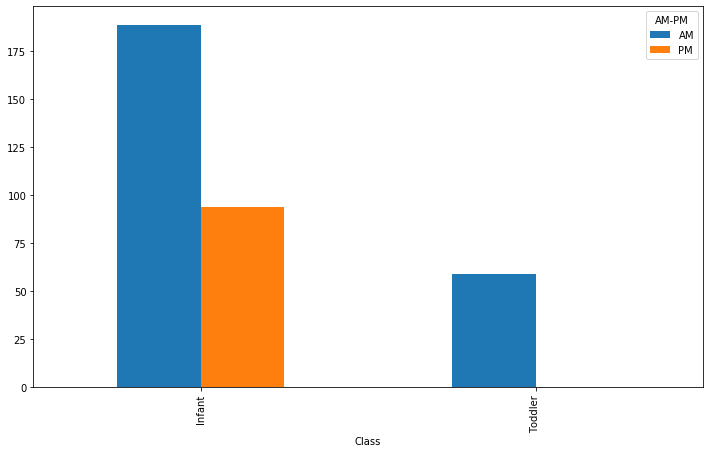

In [71]:
ByClass.plot(kind='bar', figsize=(12,7))